In [71]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import cv2
from numpy import mean
from numpy import std

from datetime import datetime as dt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,  roc_auc_score
import time
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [2]:
folders=os.listdir( '245_data')
print(folders)

['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'alpha', 'ascii_124', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '[', ']', '{', '}']


In [3]:
numeric_data=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
alphabet_data=['A', 'b','C','d', 'e', 'f', 'G', 'H', 'i', 'j', 'k', 'l', 'M','N','o', 'p','q', 'R','S','T', 'u', 'v', 'w', 'X', 'y', 'z']
symbol_data=['!', '(', ')', '+', ',', '-','=','alpha', 'ascii_124', 'beta', 'cos', 'Delta', 'div','exists', 'forall', 'forward_slash','gamma', 'geq', 'gt', 'in', 'infty', 'int','lambda', 'ldots', 'leq', 'lim', 'log', 'lt','mu', 'neq', 'phi', 'pi', 'pm', 'prime', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', '[', ']', '{', '}']

In [4]:
data = []
label = []

for each in numeric_data:
    file_ct=0
    currentFolder = 'C:/Users/Yunao/Downloads/245_data/' + each
    for i, file in enumerate(os.listdir(currentFolder)):
        if file_ct > 1000:
                break
        im= cv2.imread((os.path.join(currentFolder, file)))
        img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        #resize
        resized_image = cv2.resize(img, (16,16))
        #normalization
        img = np.array(resized_image)/255
        
        img = img.ravel()
        img = img.tolist()
        
        data.append(img)
        label.append(each)
            
        file_ct+=1
        
numeric_df = pd.DataFrame(data)
numeric_df["label"] = label

numeric_df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,label
0,1.000000,1.0,1.000000,0.996078,1.000000,1.000000,0.219608,0.898039,0.901961,0.094118,...,0.905882,0.905882,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,0
1,1.000000,1.0,1.000000,1.000000,0.843137,0.878431,0.074510,0.996078,0.984314,0.992157,...,0.905882,0.905882,0.294118,1.000000,1.000000,1.000000,1.0,1.0,1.0,0
2,1.000000,1.0,1.000000,0.654902,0.905882,0.905882,0.901961,0.901961,0.458824,0.992157,...,0.905882,0.905882,0.729412,0.125490,0.996078,0.996078,1.0,1.0,1.0,0
3,1.000000,1.0,1.000000,0.996078,0.988235,0.992157,1.000000,0.576471,0.537255,0.094118,...,0.901961,0.572549,0.996078,1.000000,1.000000,1.000000,1.0,1.0,1.0,0
4,0.996078,1.0,0.996078,1.000000,0.905882,0.905882,0.800000,0.996078,0.996078,0.992157,...,0.905882,0.905882,0.901961,0.878431,1.000000,1.000000,1.0,1.0,1.0,0


In [6]:
numeric_df.shape

(10010, 257)

Text(0.5, 1.0, 'Number Distribution')

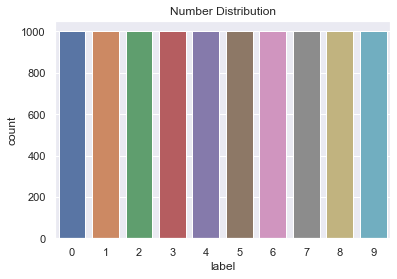

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="label", data=numeric_df)
plt.title('Number Distribution')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


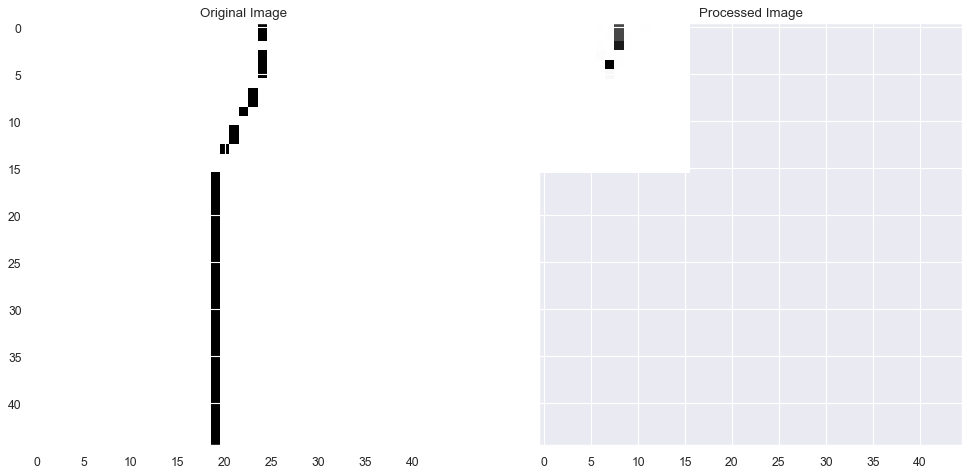

In [8]:
#original image instance
import cv2
from keras.preprocessing.image import img_to_array
i=0
original_image=[]
path = r'C:/Users/Yunao/Downloads/245_data/1/1_2.jpg'
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image.append(img_to_array(img))


#processed image instance
processed_image=[]
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(img, (16,16))   
resized_image = resized_image.astype('float32') / 255
processed_image.append(img_to_array(resized_image))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80, sharex=True, sharey=True)


ax[1].imshow(np.squeeze(processed_image),cmap='gray')
ax[0].imshow(np.squeeze(original_image))

ax[0].title.set_text('Original Image')
ax[1].title.set_text('Processed Image')

Prepare for training

In [28]:
df1=numeric_df

data=df1.iloc[:,:-1]
label=df1.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit_transform(label)

#60% train, 20% test, 20% validation
X_train, X_test, y_train, y_test = train_test_split(data, label_encoded, test_size=0.2, random_state=22, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=22)

In [29]:
print('Training dataset contains: ', X_train.shape, ' data')
print('Testing dataset contains: ', X_test.shape, ' data')
print('Validation dataset contains: ', X_val.shape, ' data')

Training dataset contains:  (6006, 256)  data
Testing dataset contains:  (2002, 256)  data
Validation dataset contains:  (2002, 256)  data


In [30]:
evaluation_col = ["Model","training duration(ms)", "predicting duration(ms)", "accuracy score"]
performance_result=[]

Model Development

0.3233834114920634


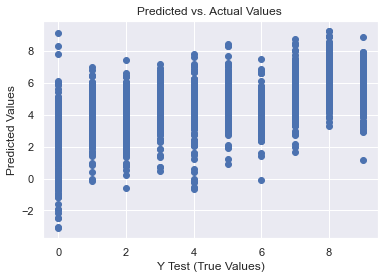

In [31]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values ')

r2 = lr_model.score(X_test,y_test)
print(r2)

In [53]:
 from sklearn.neighbors import KNeighborsClassifier
    
train_start = time.time()
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
traing_time = int((time.time() - train_start)*1000)
    
predict_start= time.time()
y_pred = KNN_classifier.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['KNN',traing_time,predict_time,accuracy])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61       202
           1       0.22      0.93      0.35       209
           2       0.47      0.41      0.44       213
           3       0.46      0.44      0.45       205
           4       0.71      0.31      0.43       197
           5       0.73      0.32      0.45       212
           6       0.74      0.56      0.64       196
           7       0.62      0.50      0.55       195
           8       0.77      0.17      0.28       195
           9       0.62      0.31      0.42       178

    accuracy                           0.45      2002
   macro avg       0.62      0.44      0.46      2002
weighted avg       0.61      0.45      0.46      2002



In [54]:
from sklearn import svm

train_start = time.time()
svm_classifier = svm.SVC(kernel='rbf',gamma=0.001,C=5)
svm_classifier.fit(X_train, y_train)
traing_time = int((time.time() - train_start)*1000)
    
predict_start= time.time()
y_pred = svm_classifier.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['SVM',traing_time,predict_time,accuracy])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       202
           1       0.58      0.90      0.71       209
           2       0.68      0.67      0.68       213
           3       0.68      0.68      0.68       205
           4       0.66      0.65      0.66       197
           5       0.84      0.67      0.75       212
           6       0.82      0.82      0.82       196
           7       0.75      0.76      0.75       195
           8       0.83      0.67      0.74       195
           9       0.71      0.65      0.67       178

    accuracy                           0.73      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.74      0.73      0.73      2002



In [34]:
from sklearn.naive_bayes import GaussianNB
    
train_start = time.time()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
traing_time = int((time.time() - train_start)*1000)
    
predict_start= time.time()
y_pred = nb_classifier.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['NB',traing_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       202
           1       0.62      0.69      0.65       209
           2       0.72      0.37      0.49       213
           3       0.79      0.27      0.41       205
           4       0.45      0.34      0.39       197
           5       0.68      0.33      0.44       212
           6       0.37      0.94      0.53       196
           7       0.83      0.22      0.35       195
           8       0.29      0.72      0.41       195
           9       0.55      0.37      0.44       178

    accuracy                           0.49      2002
   macro avg       0.61      0.49      0.48      2002
weighted avg       0.61      0.49      0.49      2002



In [35]:
from sklearn.tree import DecisionTreeClassifier
    
train_start = time.time()
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
traing_time = int((time.time() - train_start)*1000)
    
predict_start= time.time()
y_pred = dt_classifier.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['DT',traing_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       202
           1       0.77      0.78      0.77       209
           2       0.56      0.54      0.55       213
           3       0.63      0.59      0.61       205
           4       0.67      0.72      0.69       197
           5       0.67      0.55      0.60       212
           6       0.78      0.84      0.81       196
           7       0.65      0.75      0.70       195
           8       0.72      0.71      0.71       195
           9       0.66      0.69      0.67       178

    accuracy                           0.69      2002
   macro avg       0.69      0.69      0.69      2002
weighted avg       0.69      0.69      0.69      2002



In [36]:
from sklearn.ensemble import RandomForestClassifier
    
train_start = time.time()
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(X_train, y_train)
traing_time = int((time.time() - train_start)*1000)
    
predict_start= time.time()
y_pred = RF_classifier.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['RF',traing_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66       202
           1       0.42      0.91      0.58       209
           2       0.65      0.15      0.25       213
           3       0.52      0.47      0.49       205
           4       0.62      0.25      0.36       197
           5       0.63      0.33      0.44       212
           6       0.43      0.87      0.58       196
           7       0.48      0.49      0.48       195
           8       0.43      0.62      0.51       195
           9       0.59      0.29      0.38       178

    accuracy                           0.50      2002
   macro avg       0.55      0.50      0.47      2002
weighted avg       0.55      0.50      0.47      2002



In [37]:
from sklearn.linear_model import SGDClassifier
    
train_start = time.time()
sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_classifier.fit(X_train, y_train)
traing_time = int((time.time() - train_start)*1000)
    
predict_start= time.time()
y_pred = sgd_classifier.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)
    
accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['GD',traing_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       202
           1       0.49      0.88      0.63       209
           2       0.91      0.44      0.59       213
           3       0.57      0.74      0.65       205
           4       0.49      0.66      0.56       197
           5       0.79      0.66      0.72       212
           6       0.84      0.79      0.81       196
           7       0.94      0.17      0.29       195
           8       0.96      0.36      0.52       195
           9       0.44      0.81      0.57       178

    accuracy                           0.63      2002
   macro avg       0.73      0.63      0.62      2002
weighted avg       0.73      0.63      0.62      2002



C:\Users\Yunao\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [65]:
eva_df = pd.DataFrame(performance_result, columns =evaluation_col)
eva_df = eva_df.round(2)
eva_df

,Model,training duration(ms),predicting duration(ms),accuracy score
0,KNN,729,5827,44.66
1,SVM,15678,3629,72.93
2,NB,83,92,49.40
3,DT,433,6,69.23
4,RF,436,36,49.85
5,GD,190,4,63.44
6,ensemble1,17036,9388,68.03
7,ensemble2,16478,9592,68.03
8,ensemble2,63279,10454,78.77
9,ensemble2,64578,11247,85.46


In [38]:
train_start = time.time()
eclf1 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf1.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble1',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       202
           1       0.35      0.96      0.51       209
           2       0.67      0.58      0.62       213
           3       0.66      0.61      0.63       205
           4       0.85      0.62      0.72       197
           5       0.91      0.54      0.68       212
           6       0.92      0.80      0.86       196
           7       0.88      0.72      0.79       195
           8       0.92      0.56      0.70       195
           9       0.88      0.49      0.63       178

    accuracy                           0.68      2002
   macro avg       0.78      0.68      0.70      2002
weighted avg       0.78      0.68      0.70      2002



In [41]:
svm_classifier=svm.SVC(probability=True)
train_start = time.time()
eclf2 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf2.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble2',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       202
           1       0.72      0.94      0.82       209
           2       0.74      0.74      0.74       213
           3       0.74      0.69      0.72       205
           4       0.79      0.78      0.78       197
           5       0.83      0.67      0.74       212
           6       0.86      0.91      0.89       196
           7       0.75      0.83      0.79       195
           8       0.83      0.75      0.79       195
           9       0.78      0.74      0.76       178

    accuracy                           0.79      2002
   macro avg       0.79      0.79      0.79      2002
weighted avg       0.79      0.79      0.79      2002



In [44]:
train_start = time.time()
eclf3 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='soft', weights=[1,1,2],flatten_transform=True)
eclf3 = eclf3.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf3.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble3',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       202
           1       0.78      0.93      0.85       209
           2       0.79      0.83      0.81       213
           3       0.85      0.80      0.83       205
           4       0.83      0.80      0.81       197
           5       0.88      0.81      0.84       212
           6       0.92      0.91      0.92       196
           7       0.84      0.86      0.85       195
           8       0.93      0.84      0.88       195
           9       0.84      0.85      0.85       178

    accuracy                           0.85      2002
   macro avg       0.86      0.85      0.86      2002
weighted avg       0.86      0.85      0.85      2002



In [57]:
svm_classifier=svm.SVC(probability=True)
train_start = time.time()
eclf4 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='soft', weights=[1,2,1],flatten_transform=True)
eclf4 = eclf4.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf4.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble4',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       202
           1       0.77      0.77      0.77       209
           2       0.56      0.54      0.55       213
           3       0.63      0.61      0.62       205
           4       0.69      0.72      0.70       197
           5       0.62      0.55      0.58       212
           6       0.75      0.83      0.79       196
           7       0.64      0.73      0.68       195
           8       0.74      0.70      0.72       195
           9       0.62      0.63      0.63       178

    accuracy                           0.68      2002
   macro avg       0.68      0.69      0.68      2002
weighted avg       0.68      0.68      0.68      2002



In [58]:
svm_classifier=svm.SVC(probability=True)
train_start = time.time()
eclf5 = VotingClassifier(estimators=[('knn', KNN_classifier), ('DT', dt_classifier), ('svm', svm_classifier)], voting='soft', weights=[2,1,1],flatten_transform=True)
eclf5 = eclf5.fit(X_train, y_train)
traning_time = int((time.time() - train_start)*1000)

predict_start= time.time()
y_pred=eclf5.predict(X_test)
predict_time = int((time.time() - predict_start)*1000)

accuracy = accuracy_score(y_test,y_pred)*100
    
performance_result.append(['ensemble5',traning_time,predict_time,accuracy])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88       202
           1       0.42      0.97      0.59       209
           2       0.73      0.66      0.69       213
           3       0.81      0.68      0.74       205
           4       0.88      0.66      0.76       197
           5       0.89      0.63      0.74       212
           6       0.87      0.89      0.88       196
           7       0.81      0.78      0.80       195
           8       0.89      0.68      0.77       195
           9       0.83      0.73      0.78       178

    accuracy                           0.75      2002
   macro avg       0.81      0.75      0.76      2002
weighted avg       0.81      0.75      0.76      2002



In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(dt_classifier, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
print('Decision Tree Model Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(eclf1, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
print('Ensemble1 Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(eclf2, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
print('Ensemble2 Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(eclf3, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
print('Ensemble3 Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Decision Tree Model Accuracy: 0.720 (0.011)
Ensemble1 Accuracy: 0.719 (0.013)
Ensemble2 Accuracy: 0.815 (0.014)
Ensemble3 Accuracy: 0.874 (0.009)


In [73]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_classifier, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
print('SVM Model Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

SVM Model Accuracy: 0.870 (0.007)


In [ ]:
scores = cross_val_score(eclf4, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
print('Ensemble4 Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(eclf5, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
print('Ensemble5 Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [63]:
import joblib
joblib_file = "ensemble1_Model.pkl"  
joblib.dump(eclf1, joblib_file)

['ensemble1_Model.pkl']

In [64]:
joblib_file = "ensemble2_Model.pkl"  
joblib.dump(eclf2, joblib_file)

joblib_file = "ensemble3_Model.pkl"  
joblib.dump(eclf3, joblib_file)

joblib_file = "ensemble4_Model.pkl"  
joblib.dump(eclf4, joblib_file)

joblib_file = "ensemble5_Model.pkl"  
joblib.dump(eclf5, joblib_file)

joblib_file = "dt_Model.pkl"  
joblib.dump(dt_classifier, joblib_file)

['dt_Model.pkl']